In [1]:
import numpy as np
np.random.seed(1001)

import os
import shutil
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
import h5py
from utils.preprocessing import convert2mel, normalize_amplitude, windowing


%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
train = pd.read_csv('../../real_data/FSDnoisy18k.meta/train_set.csv')
train.shape#test = pd.read_csv("../../real_data/sample_submission.csv")


(17310, 6)

In [3]:
train.shape

(17310, 6)

In [4]:
import librosa
import numpy as np
import scipy


In [5]:
class Config(object):
    def __init__(self,
                 sampling_rate=44100, audio_duration=2, n_classes=41,
                 use_mfcc=False, n_folds=10, learning_rate=0.0001, 
                 max_epochs=50, n_mfcc=20):
        self.sampling_rate = sampling_rate
        self.audio_duration = audio_duration
        self.n_classes = n_classes
        self.use_mfcc = use_mfcc
        self.n_mfcc = n_mfcc
        self.n_folds = n_folds
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

        self.audio_length = self.sampling_rate * self.audio_duration
        if self.use_mfcc:
            self.dim = (self.n_mfcc, 1 + int(np.floor(self.audio_length/512)), 1)
        else:
            self.dim = (self.audio_length, 1)

In [6]:
print('Minimum samples per category = ', min(train.label.value_counts()))
print('Maximum samples per category = ', max(train.label.value_counts()))

Minimum samples per category =  301
Maximum samples per category =  1136


In [7]:
pwd

'/Users/fabian_acustica/Dropbox/FabianCloud/MscAI/SecondSemester/MLP Second Semester/PersonalRepo/MLPProjectAudio'

In [8]:
# JUST RUN ONCE!!
#import wave
#path = '../../data/audio_train'

#maximum_audio_frame = 1323000  # THIS WAS OBTAINED IN A FORMER RUN.

#for audio in train['fname']:
#    wav = wave.open(path + "/" + audio)
#    if wav.getnframes() > maximum_audio_frame:
#        maximum_audio_frame = wav.getnframes()
#print(maximum_audio_frame)

In [9]:
46440/32000


1.45125

(46440,)
<class 'numpy.ndarray'>


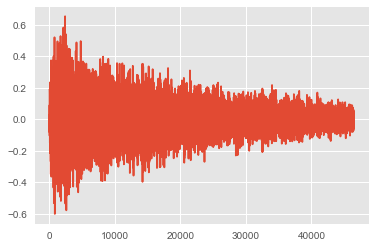

In [10]:
fs =32000
path = '../../processed_wavs_final_train'
prueba= train['fname'][7]
data, _ = librosa.core.load(path + "/" + prueba, sr=fs, res_type="kaiser_best")
print(data.shape)
print(type(data))
plt.plot(data)
plt.show()

In [11]:
round(len(data) / fs,2)

1.45

In [12]:
n_mels = 96
audio_duration = round(len(data) / fs,2)  # 2 seconds
fs= 32000 # we will make downsampling to save some data!!44100
n_fft = 2048
windows_size_s = 30 # 30 milisecons windowing (to have more context)
windows_size_f = (windows_size_s * fs ) // 1000  # int division # 960 samples
hop_length_samples = int(windows_size_f // 2) ## 480 samples
number_of_frames = fs * 2 # deprecated, use short audio in database already
fmax = int(fs / 2)
fmin = 0
normalize_audio = True
spectrogram_type = 'power'
maximum_mel = 0

mel_example = convert2mel(prueba,path,fs, n_fft,fmax,n_mels,hop_length_samples, windows_size_f)
mel_example.shape

(96, 97)

In [21]:
mel_example
mels = librosa.core.power_to_db(mel_example, ref=np.min(mel_example), top_db=90.0)
mels / np.max(mels)

array([[0.57822382, 0.57712567, 0.53868833, ..., 0.38870473, 0.40958251,
        0.40724777],
       [0.61041064, 0.67283823, 0.63278957, ..., 0.51367641, 0.46505438,
        0.52075148],
       [0.63795691, 0.70891455, 0.64336928, ..., 0.56371115, 0.5805843 ,
        0.56689113],
       ...,
       [0.11793933, 0.11793933, 0.22596825, ..., 0.11793933, 0.11793933,
        0.11793933],
       [0.11793933, 0.11793933, 0.22511565, ..., 0.11793933, 0.11793933,
        0.11793933],
       [0.11793933, 0.11793933, 0.22457255, ..., 0.11793933, 0.11793933,
        0.11793933]])

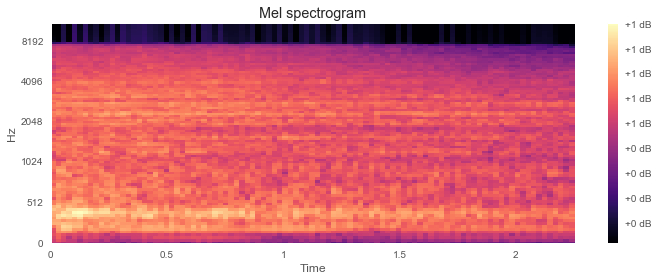

In [22]:
### mel spectrogram plot
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(mels / np.max(mels), y_axis='mel', x_axis='time')
plt.colorbar(format='%+1.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [15]:
data_new = np.tile(data,mul)

NameError: name 'mul' is not defined

In [ ]:
plt.plot(data_new)

In [ ]:
import IPython.display as ipd  # To play sound in the notebook
fname = path + "/" + prueba
ipd.Audio(fname)

In [ ]:
def get_fixed_length(audio, number_of_frames):
    if audio.shape[0] > number_of_frames:
        return np.delete(audio, np.arange(number_of_frames, audio.shape[0]), axis=0)
    elif audio.shape[0] < number_of_frames:
        mul = int(round(number_of_frames / audio.shape[0], 0))
        repeated_matrix = np.tile(audio.T, mul).T
        if repeated_matrix.shape[0] > number_of_frames:
            return np.delete(repeated_matrix, np.arange(number_of_frames, repeated_matrix.shape[0]), axis=0)
        return repeated_matrix
    else:
        return audio

In [ ]:
get_fixed_length(mels.T, 100).shape

usage: __main__.py [-h] [-p PARAMS_PREPROCESSING] [-e EXPERIMENT_NUMBER]
                   [-t TESTING]
__main__.py: error: unrecognized arguments: -f /Users/fabian_acustica/Library/Jupyter/runtime/kernel-28ed6159-0884-4fe2-8d33-86c73deccefd.json


SystemExit: 2

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
